Assignment 1 - Car Price Prediction

## Task 1. Preparing the datasets

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib
np.__version__, pd.__version__, matplotlib.__version__

('1.25.2', '2.2.3', '3.9.2')

### 01. Load dataset

In [3]:
df = pd.read_csv('Dataset/Cars.csv')

In [4]:
# print the first rows of data
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [5]:
# Check the shape of data
df.shape

(8128, 13)

In [6]:
# For the feature fuel, remove all rows with CNG and LPG due to different mileage system
# Remove rows where fuel is CNG or LPG
df = df[~df['fuel'].isin(['CNG', 'LPG'])]

# Check the shape of data after the changes
df.shape

(8033, 13)

In [7]:
# Remove "kmpl" in feature "mileage" and convert to float
df['mileage'] = df['mileage'].str.split().str[0].astype(float)

# Remove "CC” in feature "engine" and convert to float
df['engine'] = df['engine'].str.split().str[0].astype(float)

# Remove "bhp" in max_power and convert to float
df['max_power'] = df['max_power'].str.split().str[0].astype(float)

df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0


In [8]:
# Statistical info about data after converting few features from string to float
df.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,8033.000000,8.033000e+03,8.033000e+03,7819.000000,7819.000000,7825.000000,7819.000000
mean,2013.818748,6.427361e+05,6.973882e+04,19.390375,1463.090677,91.864733,5.421281
std,4.031655,8.098635e+05,5.664361e+04,4.001777,504.655439,35.846839,0.962876
min,1983.000000,2.999900e+04,1.000000e+03,0.000000,624.000000,0.000000,2.000000
25%,2011.000000,2.600000e+05,3.500000e+04,16.780000,1197.000000,69.000000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,82.400000,5.000000
75%,2017.000000,6.800000e+05,9.800000e+04,22.320000,1582.000000,102.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


In [9]:
# Check data types of input data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8033 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8033 non-null   object 
 1   year           8033 non-null   int64  
 2   selling_price  8033 non-null   int64  
 3   km_driven      8033 non-null   int64  
 4   fuel           8033 non-null   object 
 5   seller_type    8033 non-null   object 
 6   transmission   8033 non-null   object 
 7   owner          8033 non-null   object 
 8   mileage        7819 non-null   float64
 9   engine         7819 non-null   float64
 10  max_power      7825 non-null   float64
 11  torque         7819 non-null   object 
 12  seats          7819 non-null   float64
dtypes: float64(4), int64(3), object(6)
memory usage: 878.6+ KB


In [10]:
#  For the feature owner, map First owner to 1, ..., Test Drive Car to 5
owner_mapping = {
    "First Owner": 1,
    "Second Owner": 2,
    "Third Owner": 3,
    "Fourth & Above Owner": 4,
    "Test Drive Car": 5
}

# Apply mapping
df["owner"] = df["owner"].map(owner_mapping)

In [11]:
# print the first rows of data
df.head()


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0


In [12]:
# Check data types of input data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8033 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8033 non-null   object 
 1   year           8033 non-null   int64  
 2   selling_price  8033 non-null   int64  
 3   km_driven      8033 non-null   int64  
 4   fuel           8033 non-null   object 
 5   seller_type    8033 non-null   object 
 6   transmission   8033 non-null   object 
 7   owner          8033 non-null   int64  
 8   mileage        7819 non-null   float64
 9   engine         7819 non-null   float64
 10  max_power      7825 non-null   float64
 11  torque         7819 non-null   object 
 12  seats          7819 non-null   float64
dtypes: float64(4), int64(4), object(5)
memory usage: 878.6+ KB


In [13]:
# Check the column names
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

### 02. Exploratory Data Analysis

Rename columns

In [14]:
# Rename the column for feature "name" with "brand", because it makes a sense
df.rename(columns = {'name':'brand'}, inplace = True)

In [15]:
print(df.columns.tolist())

df.head()

['brand', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque', 'seats']


,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0


In [16]:
df.dtypes

brand             object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner              int64
mileage          float64
engine           float64
max_power        float64
torque            object
seats            float64
dtype: object

Univariant Analysis

In [17]:
# check number of unique brands in the dataset
df["brand"].nunique()

2018

In [18]:
# print unique brands in the dataset
df["brand"].unique()

array(['Maruti Swift Dzire VDI', 'Skoda Rapid 1.5 TDI Ambition',
       'Honda City 2017-2020 EXi', ..., 'Tata Nexon 1.5 Revotorq XT',
       'Ford Freestyle Titanium Plus Diesel BSIV',
       'Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV'], dtype=object)

In [19]:
# For car brands, take only the first word and remove the rest
df['brand'] = df['brand'].str.split().str[0]

In [20]:
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0


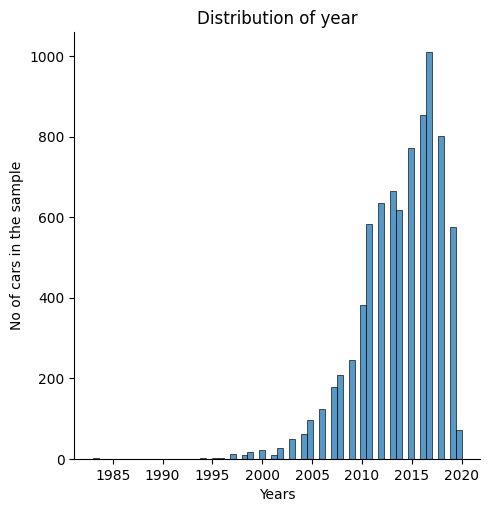

In [21]:
# Explore range of years related to cars in the dataset
sns.displot(data = df, x = 'year')
# Add labels
plt.xlabel("Years")
plt.ylabel("No of cars in the sample")
plt.title("Distribution of year")

plt.show()

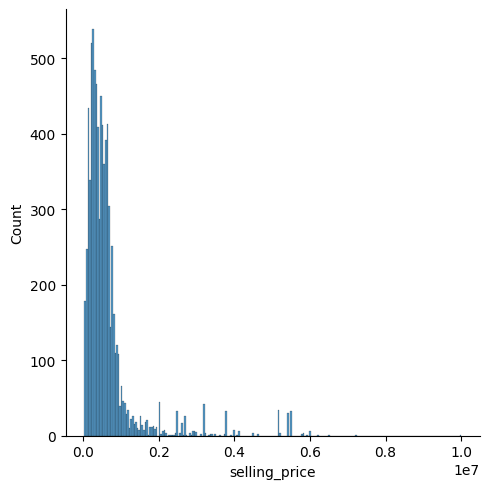

In [22]:
# Explore the distribution of car seling price across the dataset
sns.displot(data = df, x = 'selling_price')

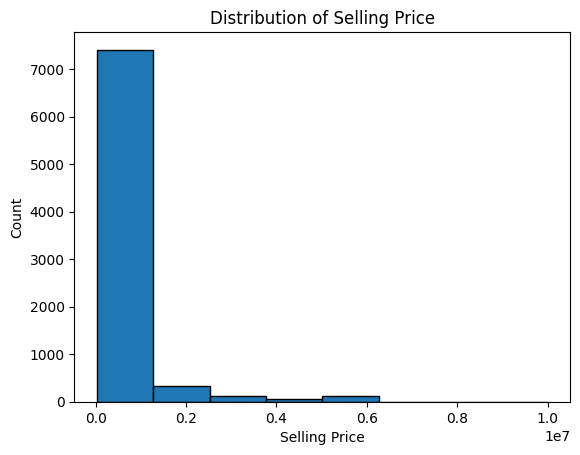

In [23]:
# For clear visualization, plot histogram for "selling_price" with 8 bins
plt.hist(df["selling_price"], bins=8, edgecolor="black")

# Add labels
plt.xlabel("Selling Price")
plt.ylabel("Count")
plt.title("Distribution of Selling Price")

plt.show()

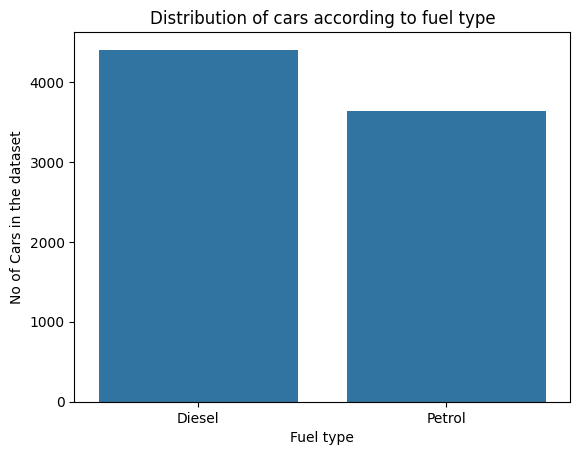

In [24]:
# Explore the distribution of cars in the dataset according to the fuel type across the dataset
sns.countplot(data = df, x = 'fuel')

# Add labels
plt.xlabel("Fuel type")
plt.ylabel("No of Cars in the dataset")
plt.title("Distribution of cars according to fuel type")

plt.show()

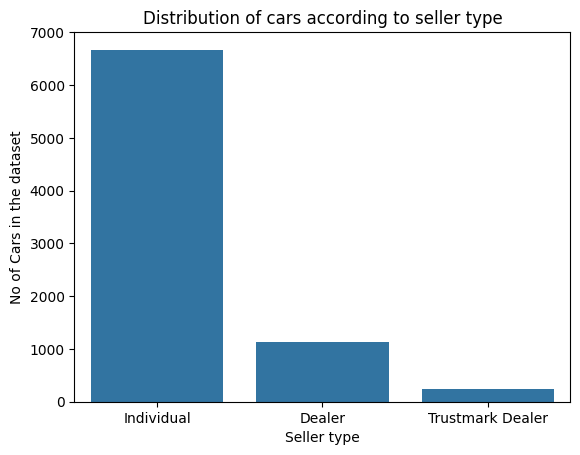

In [25]:
# Explore the distribution of cars in the dataset according to the seller type across the dataset
sns.countplot(data = df, x = 'seller_type')

# Add labels
plt.xlabel("Seller type")
plt.ylabel("No of Cars in the dataset")
plt.title("Distribution of cars according to seller type")

plt.show()

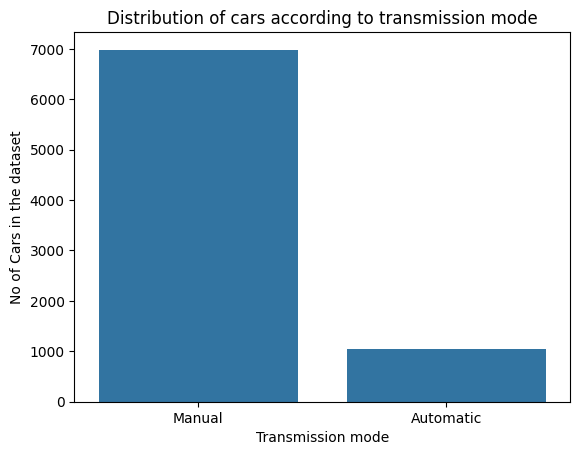

In [26]:
# Explore the distribution of cars in the dataset according to the transmission type across the datasetS
sns.countplot(data = df, x = 'transmission')

# Add labels
plt.xlabel("Transmission mode")
plt.ylabel("No of Cars in the dataset")
plt.title("Distribution of cars according to transmission mode")

plt.show()



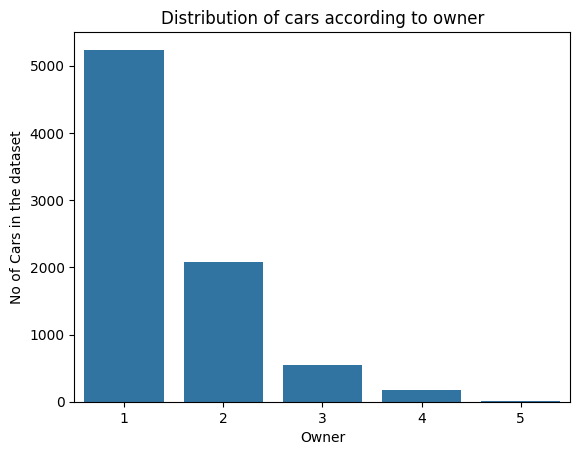

In [27]:
# Explore the distribution of cars in the dataset according to the owner type across the dataset
sns.countplot(data = df, x = 'owner')

# Add labels
plt.xlabel("Owner")
plt.ylabel("No of Cars in the dataset")
plt.title("Distribution of cars according to owner")

plt.show()


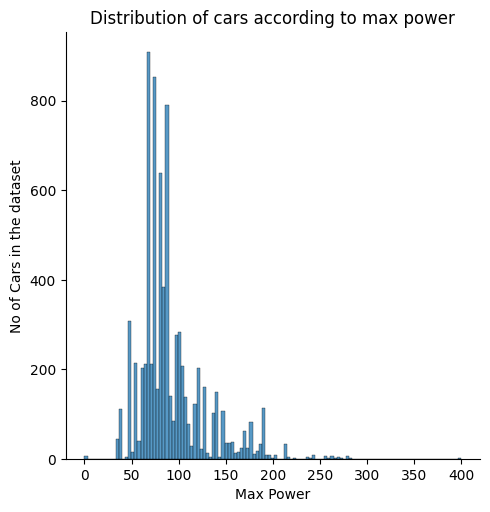

In [28]:
sns.displot(data = df, x = "max_power")

# Add labels
plt.xlabel("Max Power")
plt.ylabel("No of Cars in the dataset")
plt.title("Distribution of cars according to max power")

plt.show()

Multivariant Analysis

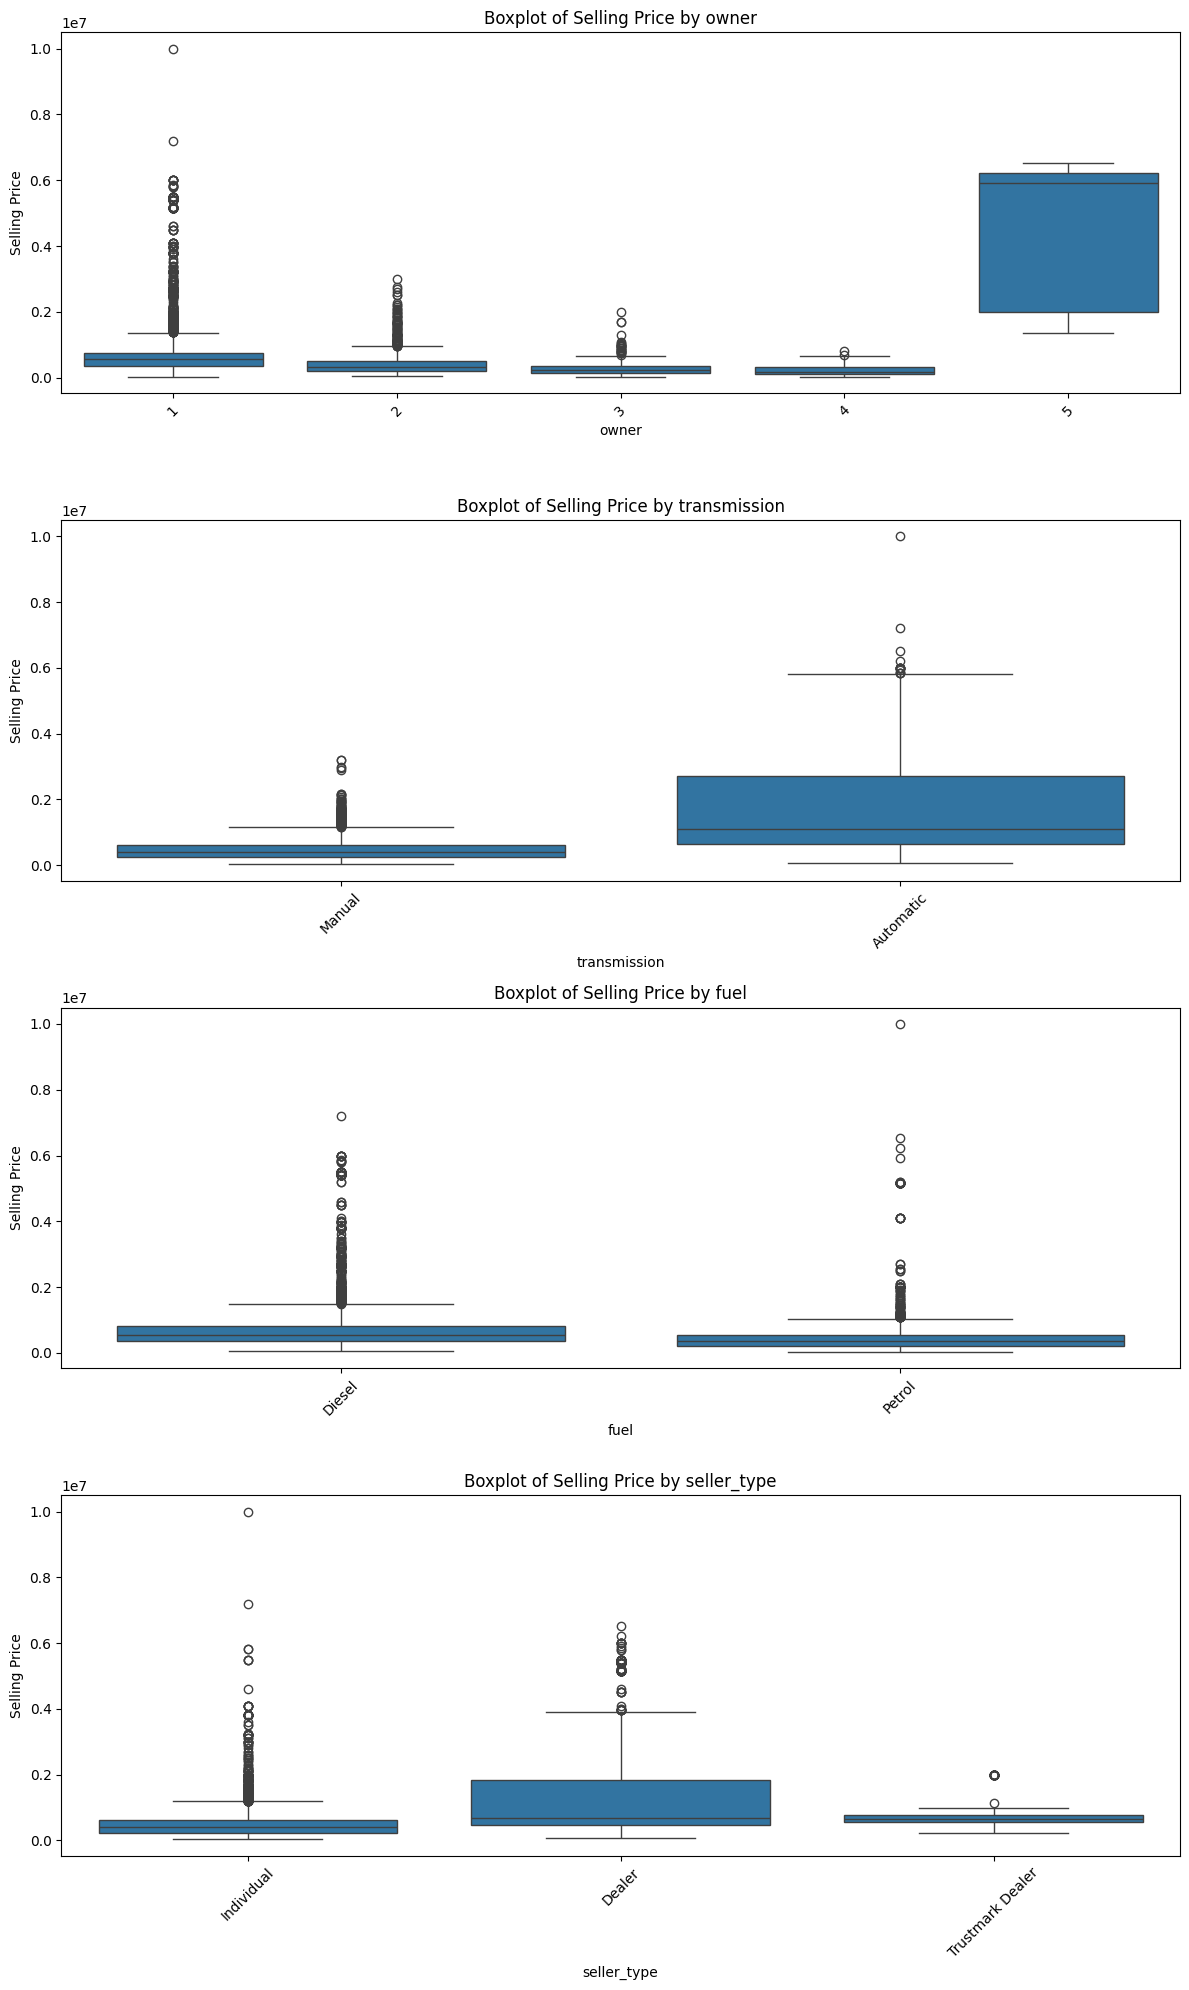

In [29]:
# Explore the relationship between categorical features and selling price using boxplots

import matplotlib.pyplot as plt
import seaborn as sns

# List of categorical features to plot
cat_cols = ["owner", "transmission", "fuel", "seller_type"]

# Set up subplot grid
rows = len(cat_cols)
fig, axes = plt.subplots(rows, 1, figsize=(12, rows * 5))  
axes = axes.flatten()

# Iterate through categorical columns and plot boxplots
for i, col in enumerate(cat_cols):
    sns.boxplot(x=df[col], y=df["selling_price"], ax=axes[i])
    axes[i].set_title(f"Boxplot of Selling Price by {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Selling Price")
    axes[i].tick_params(axis='x', rotation=45)

# Remove unused subplot spaces
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


<Axes: xlabel='year', ylabel='selling_price'>

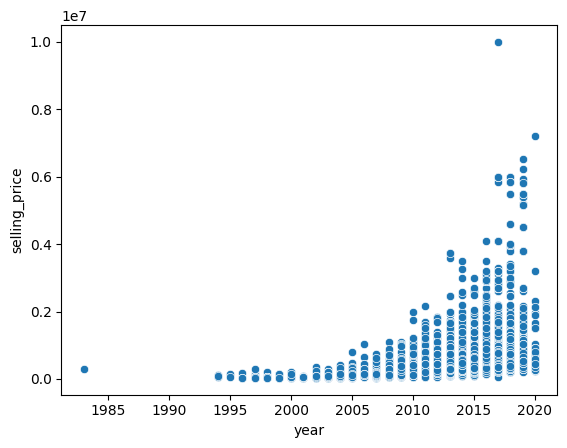

In [30]:
# Explorethe selling price of sample dataset with respect to the year of car manufacturing
sns.scatterplot(x = df['year'], y = df['selling_price'])

<Axes: xlabel='year', ylabel='selling_price'>

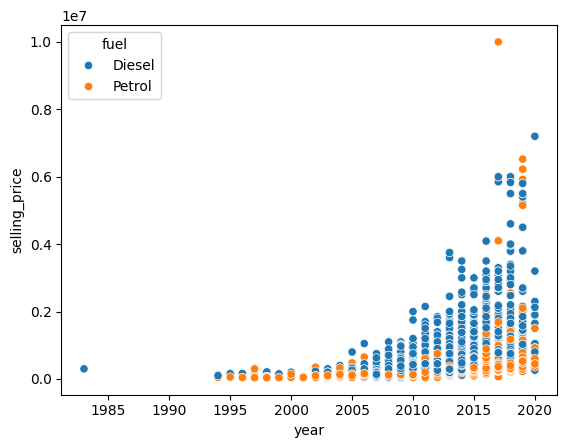

In [31]:
# Explorethe selling price of sample dataset with respect to the year of car manufacturing and fuel type
sns.scatterplot(x = df['year'], y = df['selling_price'], hue=df['fuel'])

<Axes: xlabel='year', ylabel='selling_price'>

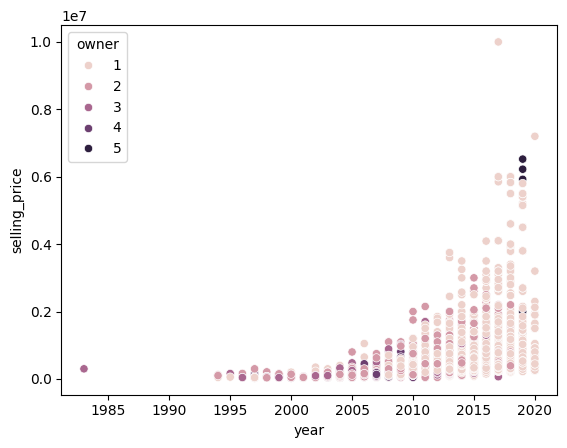

In [32]:
# Explorethe selling price of sample dataset with respect to the year of car manufacturing and owner type
sns.scatterplot(x = df['year'], y = df['selling_price'], hue=df['owner'])

<Axes: xlabel='mileage', ylabel='selling_price'>

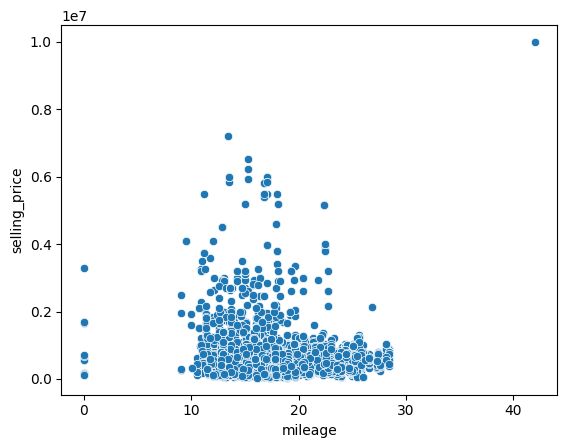

In [33]:
# Explorethe selling price of sample dataset with respect to the mileage of cars
sns.scatterplot(x = df['mileage'], y = df['selling_price'])

Correlation Matrix

Explore strong factors predicting the car price and checking whether certain features are too correlated

In [34]:
# drop the column because Chaky’s company does not understand well about it
df = df.drop('torque', axis='columns')

In [35]:
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


Label Encoding

In [36]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [37]:
unique_values = df['brand'].unique()
print("Unique attributes in 'brand':", unique_values)

Unique attributes in 'brand': ['Maruti' 'Skoda' 'Honda' 'Hyundai' 'Toyota' 'Ford' 'Renault' 'Mahindra'
 'Tata' 'Chevrolet' 'Fiat' 'Datsun' 'Jeep' 'Mercedes-Benz' 'Mitsubishi'
 'Audi' 'Volkswagen' 'BMW' 'Nissan' 'Lexus' 'Jaguar' 'Land' 'MG' 'Volvo'
 'Daewoo' 'Kia' 'Force' 'Ambassador' 'Ashok' 'Isuzu' 'Opel' 'Peugeot']


In [38]:
# one hot encoding better when there are less than 4 - 5 unique features in the column.
# as 'brand' column has 32 unique values, label encoding will be applied

# label encoding for 'brand' column
le = LabelEncoder()
df["brand"] = le.fit_transform(df["brand"])

df["brand"].unique()


array([20, 27, 10, 11, 29,  9, 26, 19, 28,  4,  7,  6, 14, 21, 22,  2, 30,
        3, 23, 17, 13, 16, 18, 31,  5, 15,  8,  0,  1, 12, 24, 25])

In [39]:
# we can call le.classes_ to know what it maps to
le.classes_

array(['Ambassador', 'Ashok', 'Audi', 'BMW', 'Chevrolet', 'Daewoo',
       'Datsun', 'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'Isuzu',
       'Jaguar', 'Jeep', 'Kia', 'Land', 'Lexus', 'MG', 'Mahindra',
       'Maruti', 'Mercedes-Benz', 'Mitsubishi', 'Nissan', 'Opel',
       'Peugeot', 'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen',
       'Volvo'], dtype=object)

In [40]:
# label encoding for 'fuel'
le = LabelEncoder()
df["fuel"] = le.fit_transform(df["fuel"])

df["fuel"].unique()


array([0, 1])

In [41]:
# we can call le.classes_ to know what it maps to
le.classes_

array(['Diesel', 'Petrol'], dtype=object)

In [42]:
# then we can try transform
le.transform(["Diesel", "Petrol"])

array([0, 1])

In [43]:
df["seller_type"].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [44]:
df["seller_type"].value_counts()

seller_type
Individual          6673
Dealer              1124
Trustmark Dealer     236
Name: count, dtype: int64

In [45]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Column to encode
col_to_encode = ["seller_type"]

# Initialize encoder
encoder = OneHotEncoder(drop="first", handle_unknown="ignore")

# Fit & transform on the dataset
encoded = encoder.fit_transform(df[col_to_encode])

# Convert back to DataFrame
encoded_df = pd.DataFrame(encoded.toarray(),
                          columns=encoder.get_feature_names_out(col_to_encode),
                          index=df.index)

# Drop original column and join encoded columns
df = pd.concat([df.drop(col_to_encode, axis=1), encoded_df], axis=1)

df.head()




,brand,year,selling_price,km_driven,fuel,transmission,owner,mileage,engine,max_power,seats,seller_type_Individual,seller_type_Trustmark Dealer
0,20,2014,450000,145500,0,Manual,1,23.40,1248.0,74.00,5.0,1.0,0.0
1,27,2014,370000,120000,0,Manual,2,21.14,1498.0,103.52,5.0,1.0,0.0
2,10,2006,158000,140000,1,Manual,3,17.70,1497.0,78.00,5.0,1.0,0.0
3,11,2010,225000,127000,0,Manual,1,23.00,1396.0,90.00,5.0,1.0,0.0
4,20,2007,130000,120000,1,Manual,1,16.10,1298.0,88.20,5.0,1.0,0.0


In [46]:
df.columns

Index(['brand', 'year', 'selling_price', 'km_driven', 'fuel', 'transmission',
       'owner', 'mileage', 'engine', 'max_power', 'seats',
       'seller_type_Individual', 'seller_type_Trustmark Dealer'],
      dtype='object')

In [47]:
# label encoding for 'transmission'
le = LabelEncoder()
df["transmission"] = le.fit_transform(df["transmission"])

df["transmission"].unique() 

array([1, 0])

In [48]:
# we can call le.classes_ to know what it maps to
le.classes_

array(['Automatic', 'Manual'], dtype=object)

In [49]:

le.transform(["Manual", "Automatic"])

array([1, 0])

In [50]:
# According to EDA for owner attribue VS selling price done above, Test Drive Cars are ridiculously expensive. 
# Since we do not want to involve this, we will simply delete all samples related to it.
df = df[df['owner'] != 5]


In [51]:
df.shape

(8028, 13)

<Axes: >

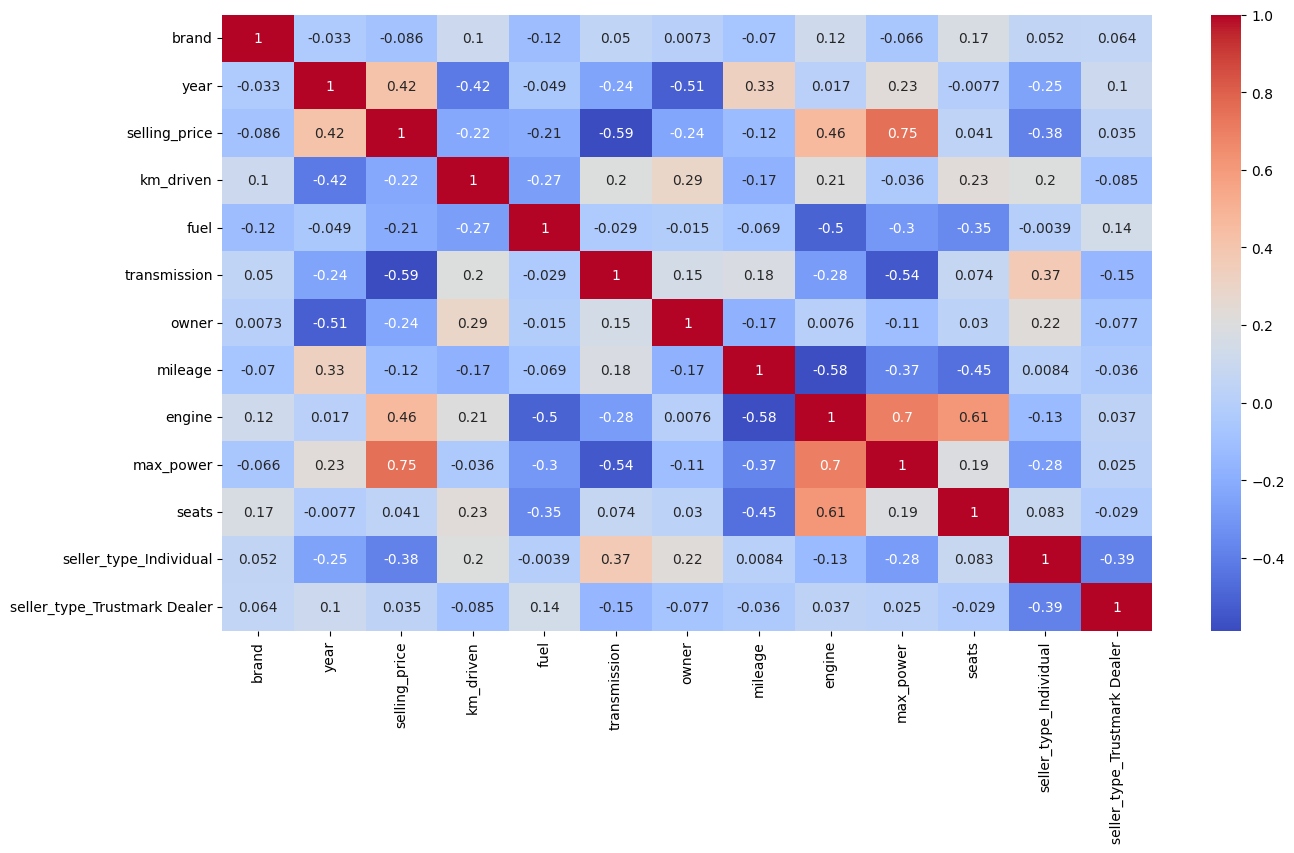

In [52]:
# Let's check out heatmap
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")  


#### 03. Feature Selection

In [53]:
#x is our strong features

X = df[['transmission','max_power']]

#y is simply the life expectancy col
y = df["selling_price"]

In [54]:
X.head()

,transmission,max_power
0,1,74.00
1,1,103.52
2,1,78.00
3,1,90.00
4,1,88.20


Train test split

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

#### 04. Preprocessing

In [56]:
# check null values

#check for null values
X_train[['transmission','max_power']].isna().sum()

transmission      0
max_power       149
dtype: int64

In [57]:
X_test[['transmission','max_power']].isna().sum()

transmission     0
max_power       59
dtype: int64

In [58]:
y_train.isna().sum()

0

In [59]:
y_test.isna().sum()

0

In [60]:
import pickle

# calculate defaults for missing values
mean_max_power = X_train["max_power"].mean()
median_max_power = X_train["max_power"].median()

#  Categorical feature defaults (transmission ratio)
transmission_counts = X_train["transmission"].value_counts(normalize=True).to_dict()

# Save defaults
defaults = {
    "mean_max_power": mean_max_power,
    "median_max_power": median_max_power,
    "transmission_ratio": transmission_counts
}

with open("defaults.pkl", "wb") as f:
    pickle.dump(defaults, f)

print("Defaults saved:", defaults)


Defaults saved: {'mean_max_power': 92.04935009140767, 'median_max_power': 82.4, 'transmission_ratio': {1: 0.8651005516995907, 0: 0.1348994483004093}}


In [61]:
## if numbers -->  average | median | regression results | 0
## if categories --> mode     |  ratio    | “No category”

#let's fill the training set first!
X_train['max_power'].fillna(X_train['max_power'].median(), inplace=True)

In [62]:
#let's fill the testing set
X_test['max_power'].fillna(X_test['max_power'].median(), inplace=True)

In [63]:
#check again
X_train[['transmission','max_power']].isna().sum()

transmission    0
max_power       0
dtype: int64

In [64]:
X_test[['transmission','max_power']].isna().sum()

transmission    0
max_power       0
dtype: int64

In [65]:
y_train.isna().sum(), y_test.isna().sum()

(0, 0)

Checking Outliers

In [66]:
def outlier_count(col, data = X_train):
    
    # calculate your 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])
    
    # calculate your inter quatile
    iqr = q75 - q25
    
    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    # count number of outliers, which are the data that are less than min_val or more than max_val calculated above
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
    # calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [67]:
for col in X_train.columns:
    outlier_count(col)


---------------transmission---------------

Number of outliers: 758
Percent of data that is outlier: 13.49%

---------------max_power---------------

Number of outliers: 409
Percent of data that is outlier: 7.28%


Scalling

#StandardScaler is usually used for continuous values
#transmission is categorical
#standardizing it will lose the category, so it will not be done here

#### 05. Model Selection

In [68]:
#Since selling price is a big number, transform the label using log transform,
y_train = np.log(y_train)
y_train.head()

6853    12.980800
1495    12.899220
7904    13.122363
1281    12.154779
1421    12.278393
Name: selling_price, dtype: float64

In [69]:
# Let's check shapes of all X_train, X_test, y_train, y_test
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (5619, 2)
Shape of X_test:  (2409, 2)
Shape of y_train:  (5619,)
Shape of y_test:  (2409,)


Modeling

Car price prediction with LinearRegression

In [70]:
from sklearn.linear_model import LinearRegression  #we are using regression models
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
yhat = lr.predict(X_test)
pred_y = np.exp(yhat)

print("MSE: ", mean_squared_error(y_test, pred_y))
print("r2: ", r2_score(y_test, pred_y))


MSE:  1358012022018.0515
r2:  -1.0321246967360218


In [71]:
y_test.head()

5948    225000
6039    900000
3069    320000
6531    650000
322     520000
Name: selling_price, dtype: int64

In [72]:
pred_y[:5]

array([403125.82035973, 693303.1923611 , 285814.86411314, 531445.42552989,
       317077.01735559])

Train many models for selecting better model for the car price prediction

In [73]:
from sklearn.linear_model import LinearRegression  
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Libraries for model evaluation

# models that we will be using, put them in a list
algorithms = [LinearRegression(), SVR(), KNeighborsRegressor(), DecisionTreeRegressor(random_state = 0), 
              RandomForestRegressor(n_estimators = 100, random_state = 0)]

# The names of the models
algorithm_names = ["Linear Regression", "SVR", "KNeighbors Regressor", "Decision-Tree Regressor", "Random-Forest Regressor"]

Training models with cross validation

In [74]:
from sklearn.model_selection import KFold, cross_val_score

#lists for keeping mse
train_mse = []
test_mse = []

#defining splits
kfold = KFold(n_splits=5, shuffle=True)

for i, model in enumerate(algorithms):
    scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    print(f"{algorithm_names[i]} - Score: {scores}; Mean: {scores.mean()}")

Linear Regression - Score: [-0.32796788 -0.3228642  -0.34776562 -0.33152735 -0.33410459]; Mean: -0.3328459267751004
SVR - Score: [-0.31923143 -0.32443111 -0.32392361 -0.3172787  -0.33416793]; Mean: -0.32380655609899056
KNeighbors Regressor - Score: [-0.16192372 -0.18516497 -0.19221386 -0.17061119 -0.18965087]; Mean: -0.1799129217533138
Decision-Tree Regressor - Score: [-0.15340954 -0.17832293 -0.14741801 -0.13640621 -0.16175544]; Mean: -0.1554624268787248
Random-Forest Regressor - Score: [-0.14187089 -0.16225371 -0.16464982 -0.14645692 -0.16872291]; Mean: -0.15679084875886504


It seems like Random Forest Regressor is giving the best results. Let's see grid search for it.

Grid Search

In [75]:
## edit where to best model then find the best parameters


from sklearn.model_selection import GridSearchCV

param_grid = {'bootstrap': [True], 'max_depth': [5, 10, None],
              'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

rf = RandomForestRegressor(random_state = 1)

grid = GridSearchCV(estimator = rf, 
                    param_grid = param_grid, 
                    cv = kfold, 
                    n_jobs = -1, 
                    return_train_score=True, 
                    refit=True,
                    scoring='neg_mean_squared_error')

# Fit your grid_search
grid.fit(X_train, y_train);  #fit means start looping all the possible parameters

y_train.head()

6853    12.980800
1495    12.899220
7904    13.122363
1281    12.154779
1421    12.278393
Name: selling_price, dtype: float64

In [76]:
grid.best_params_

{'bootstrap': True, 'max_depth': None, 'n_estimators': 15}

In [77]:
# Find your grid_search's best score
best_mse = grid.best_score_
best_mse 

-0.15472390773485187

#### 06. Testing

In [78]:
# test the model with the best parameters
yhat = grid.predict(X_test)
pred_y = np.exp(yhat)
mean_squared_error(y_test, pred_y)

96625100464.78674

In [79]:
# Best model R2
print("r2: ", r2_score(y_test, pred_y))

r2:  0.8554105193507026


In [80]:
print(yhat)
print(pred_y)
print(y_test)

[12.39694036 13.74977516 12.85827119 ... 12.34613621 13.53900755
 12.37051539]
[242059.86633861 936378.59581422 383951.37224727 ... 230069.383546
 758431.33702615 235747.21642181]
5948    225000
6039    900000
3069    320000
6531    650000
322     520000
         ...  
5744    200000
1010    600000
4856    150000
7542    650000
560     300000
Name: selling_price, Length: 2409, dtype: int64


#### 0.7 Analyze feature importance

Alogorithm way

In [81]:
#stored in this variable
#note that grid here is random forest
rf = grid.best_estimator_

rf.feature_importances_

array([0.0225354, 0.9774646])

Text(0.5, 0, 'Random Forest Feature Importance')

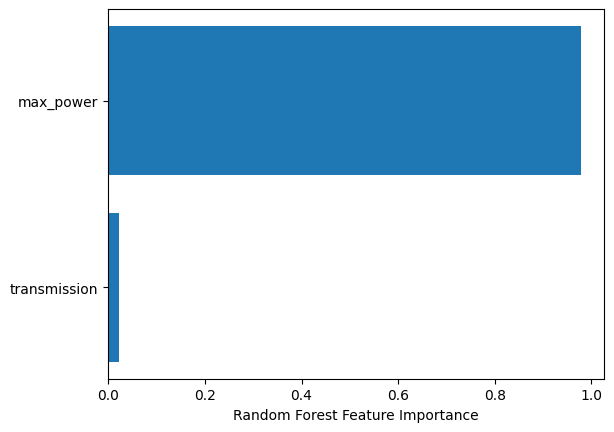

In [82]:
# let's plot

sorted_idx = rf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

Permutation way

Text(0.5, 0, 'Random Forest Feature Importance')

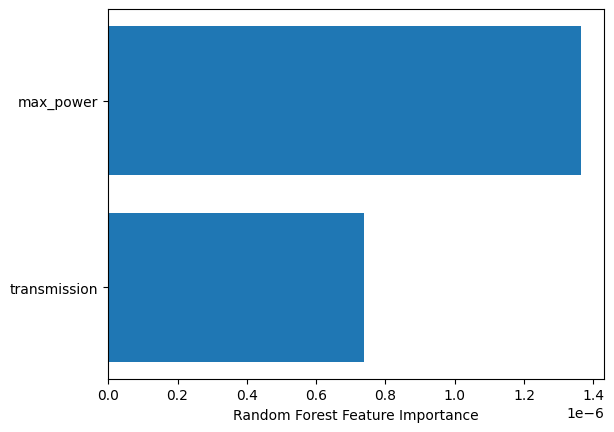

In [83]:
### edit

from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(rf, X_test, y_test)

#let's plot
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

Shap way

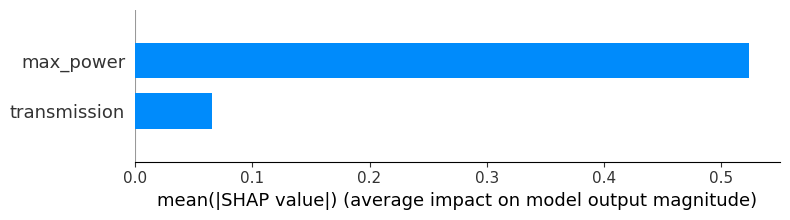

In [84]:
import shap

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

#shap provides plot
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names = X.columns)

#### 08. Inference

In [85]:
import pickle

# save the model to disk
filename = 'car-prediction.model'
pickle.dump(grid, open(filename, 'wb'))

In [86]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

In [87]:
## edit

#let's try to create one example for testing
df[['transmission','max_power','selling_price']].loc[10]

transmission          1.00
max_power           108.45
selling_price    500000.00
Name: 10, dtype: float64

In [88]:
sample = np.array([[1, 108.45]])

In [89]:
predicted_car_price = loaded_model.predict(sample)
predicted_car_price = np.exp(predicted_car_price)
predicted_car_price

array([603593.6259123])

## Discussion

#### Introduction

Chaky Company is a company that makes new cars and sells them to its customers. When selling the cars, the company faces difficulty in setting a price for the car. To address this problem, a machine learning model is implemented in this project, enabling the prediction of car prices. Many factors could affect changes in car prices. In the given dataset with the size of (8128, 13), 12 features were considered as independend variables at the begining. These variables are 'name', 'year', 'km_driven', 'fuel', 'seller_type', 'transmission'', 'owner', 'mileage', 'engine', 'max_power', 'torque', and 'seats'. As it was supposed to predict the car price, the column 'selling_price' was considered as the target variable. 

#### Feature Selection Analysis

At the beginning of the code implementation, variable 'torque' was dropped because the company did not have a better idea about the feature. Later, after generating the correlation matrix, it was able to find good features for model training, which are not correlated to each other, but have high absolute correlation to the target variable (setting_price).  'max_power'  (0.75) and 'transmission' (-0.59) are the variables that score higher absolute values in the matrix than others. Even though 'year' and 'engine' variables also have scored nearly 0.5, they were not selected as independent variables for model training. This is because it is good to select fewer features for Machine learning model development. Therefore, only 'max_power' and 'transmission' were selected as independent variables for model training. After finding the best model for car prediction, it further analyzed the importance of 'max_power' and 'transmission' for model output using the algorithm, permutation and shap way. In the Algorithm way, 'max_power' and 'transmission' got importance of 0.0225354 and 0.9774646, respectively. It indicates that 'max_power' is the key driver of car prices in the dataset, and 'transmission' has minimal effect. Permutation way measures how much the model’s performance decreases when the values of one feature are randomly shuffled. In this analysis, when 'max_power' (importance = 0.5) was shuffled, the model’s performance dropped significantly, showing that this feature is crucial for predicting car prices. In contrast, when 'transmission' (importance is almost 0) was shuffled, there was almost no change in performance, indicating that it does not meaningfully contribute to the model’s predictive power.  The SHAP results confirm the previous findings from Random Forest feature importance and permutation importance. It showed a consistent ranking of features: 'max_power' (importance = 0.5) dominates, while 'transmission' (around 0.08) plays a minor role.

#### Model Performance Analysis

To find the best model for predicting car prices, Linear Regression, SVR, KNeighbors Regressor, Decision-Tree Regressor, and Random Forest Regressor algorithms were used to train the models. These algorithms were considered in this project because they support regression analysis, like predicting car prices. Among them, Random-Forest Regressor performed the best, achieving the lowest mean MSE (-0.151), closely followed by Decision Tree (-0.154) and K-Nearest Neighbors (-0.184). They performed well than others since they are all non-linear and flexible models that can capture complex relationships between features and car prices. Linear Regression and SVR had higher MSEs (-0.333 and -0.324, respectively). Linear Regression performed worse that may be due to assuming a linear relationship between features and target. If the true relationship is non-linear (likely for car prices), it underperforms. Even though SVR can capture non-linearity, as it may be sensitive to parameter tuning, it did not outperform the tree-based models. Therefore, as the best algorithm, Random Forest was used to train the model. From the grid search, it was able to find the best parameter for the prediction model (MSE: -0.1521) with Random Forest algorithm. After testing the model, the best searched model showed r2 as 0.855.


In [ ]:
## GitHub Link

https://github.com/supipivirajini96-maker/car-price-prediction.git